## Looking at all tanks from 22MT - 20 tonne Capacity 

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,9482,3055706,107737576,2502,TAKE A SAMPLE AND SUBMIT FOR QA.,NaN,NaN,0.000,08/05/2022 11:43,08/05/2022 11:54,11,0,19,0.0000,NaN,10,1.0,0
9483,9483,3055706,107737576,2502,SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGENISE),NaN,NaN,0.000,08/05/2022 11:54,08/05/2022 11:55,1,0,20,0.0000,NaN,10,0.0,0
9484,9484,3055706,107737576,2502,STEP8_AGITATION,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,1,21,0.0000,NaN,0,0.0,0
9485,9485,3055706,107737576,2502,S4_BATCH_COMPLETE_QA_PENDING,NaN,NaN,0.000,08/05/2022 11:56,08/05/2022 11:56,0,0,22,0.0000,NaN,0,NaN,0


In [4]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [22]:
tanks = [2202, 2203, 2204]  # List of tank IDs you want to query
ProductionTanks_df = ProductionTank.query('Tank_1 in @tanks')
print(ProductionTanks_df)

      Material    BATCHID  Tank_1             Instruction_Step   INGRED_ID  \
2001   1397022  107956670    2202         S3_BATCH_IN_PROGRESS         NaN   
2002   1397022  107956670    2202                   STEP1_CONS     1002565   
2003   1397022  107956670    2202  PLEASE VERIFY BULK ADDITION         NaN   
2004   1397022  107956670    2202                   STEP1_CONS     1037802   
2005   1397022  107956670    2202                   STEP1_CONS     1002818   
...        ...        ...     ...                          ...         ...   
7818   1775253  108051514    2203                   STEP2_CONS  U_86MT15_1   
7819   1775253  108051514    2203              STEP2_AGITATION         NaN   
7820   1775253  108051514    2203            WEIGHT_VALIDATION         NaN   
7821   1775253  108051514    2203              STEP3_AGITATION         NaN   
7822   1775253  108051514    2203                           HP         NaN   

                               INGRED_Name   Quantity       Pha

In [24]:

# Group by 'Batch' and extract the 'Quantity' for the 'HP' instruction step
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()

#print(hp_quantities)

In [25]:
# Extracting the 'Quantity' for the 'HP' instruction step for each 'BATCHID'
hp_quantities = ProductionTanks_df[ProductionTanks_df['Instruction_Step'] == 'HP'].groupby('BATCHID')['Quantity'].sum()

# Aggregating data per tank
aggregated_ProductionTank22_df1 = ProductionTanks_df.groupby(['BATCHID','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay': 'sum',
    #'Quantity': 'sum',
    'Flowrate_KGMIN': 'mean',
    'Target_Phase_duration': 'mean',
    'Target_Flowrate': 'mean'
}).reset_index()

# Merging the aggregated data with the HP quantities
aggregated_ProductionTank22_df1 = aggregated_ProductionTank22_df1.merge(hp_quantities, on='BATCHID', how='left', suffixes=('', '_from_HP'))

# Print the resulting DataFrame
print(aggregated_ProductionTank22_df1)

      BATCHID  Tank_1  Phase_duration  Phase_overrun  Phase_start_delay  \
0   107848868    2202             806           94.0                 21   
1   107848868    2204             879          640.0               2519   
2   107862335    2204             530          210.0               5231   
3   107867810    2202            1098          884.0               2146   
4   107867810    2203             182           25.0                 24   
..        ...     ...             ...            ...                ...   
68  108073632    2202             873          667.0               4254   
69  108075449    2204            1001          724.0               2088   
70  108084749    2203             231            9.0                  2   
71  108084749    2204             443          187.0               5291   
72  108084750    2202             204           11.0                  3   

    Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate   Quantity  
0        17.726500         

In [33]:
####Aggregate data per tank
aggregated_ProductionTank22_df2=ProductionTanks_df.groupby(['BATCHID','Material','Tank_1']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
   'Phase_start_delay':'sum',
   'Quantity':'sum',
   'Flowrate_KGMIN':'mean',
   'Target_Phase_duration':'mean',
   'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_ProductionTank22_df2)

      BATCHID  Material  Tank_1  Phase_duration  Phase_overrun  \
0   107848868   1520984    2202             806           94.0   
1   107848868   1520984    2204             879          640.0   
2   107862335   1698522    2204             530          210.0   
3   107867810   1648637    2202            1098          884.0   
4   107867810   1648637    2203             182           25.0   
..        ...       ...     ...             ...            ...   
68  108073632   1451704    2202             873          667.0   
69  108075449   1428047    2204            1001          724.0   
70  108084749   1567195    2203             231            9.0   
71  108084749   1567195    2204             443          187.0   
72  108084750   1520984    2202             204           11.0   

    Phase_start_delay   Quantity  Flowrate_KGMIN  Target_Phase_duration  \
0                  21  18081.024       17.726500             121.500000   
1                2519  36162.048      105.548567         

## EDA on Tanks 22MT 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Just looks at batchid details produced in tank 22MT
df = pd.DataFrame(aggregated_ProductionTank22_df1)
# Just looks at batchid and materials details produced in tank 22MT
df2 = pd.DataFrame(aggregated_ProductionTank22_df2)

In [36]:
#df2

,BATCHID,Material,Tank_1,Phase_duration,Phase_overrun,Phase_start_delay,Quantity,Flowrate_KGMIN,Target_Phase_duration,Target_Flowrate
0,107848868,1520984,2202,806,94.0,21,18081.024,17.726500,121.500000,237.850400
1,107848868,1520984,2204,879,640.0,2519,36162.048,105.548567,16.266667,302.778350
2,107862335,1698522,2204,530,210.0,5231,32995.380,81.965782,19.176471,152.181450
3,107867810,1648637,2202,1098,884.0,2146,29200.600,90.420675,11.150000,177.123836
4,107867810,1648637,2203,182,25.0,24,14600.300,13.670692,17.583333,229.221200
...,...,...,...,...,...,...,...,...,...,...
68,108073632,1451704,2202,873,667.0,4254,24377.066,68.761347,11.368421,167.966560
69,108075449,1428047,2204,1001,724.0,2088,36974.922,92.402843,12.695652,171.444523
70,108084749,1567195,2203,231,9.0,2,19989.399,42.987960,46.800000,237.850400
71,108084749,1567195,2204,443,187.0,5291,39978.798,104.555633,16.500000,203.054711


In [53]:
# Set global font settings
plt.rc('axes', titlesize=16, titleweight='bold', labelsize=14, labelweight='bold')  # For axes title and labels
plt.rc('xtick', labelsize=12)  # For x-axis tick labels
plt.rc('ytick', labelsize=12)  # For y-axis tick labels


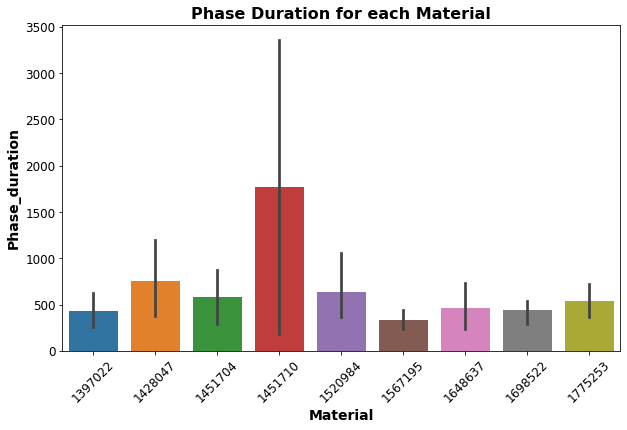

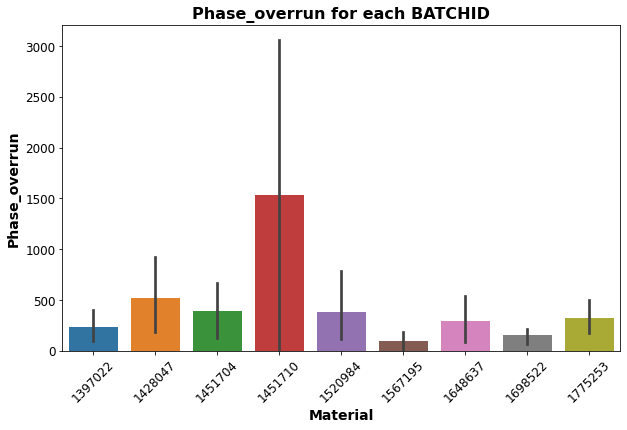

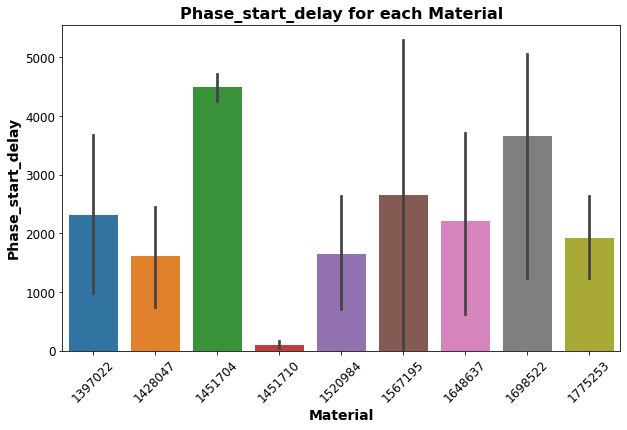

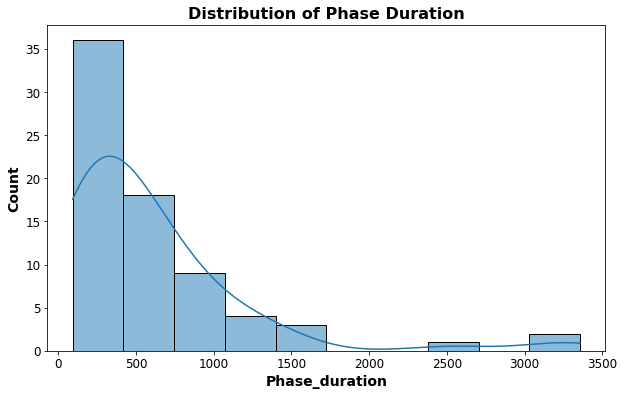

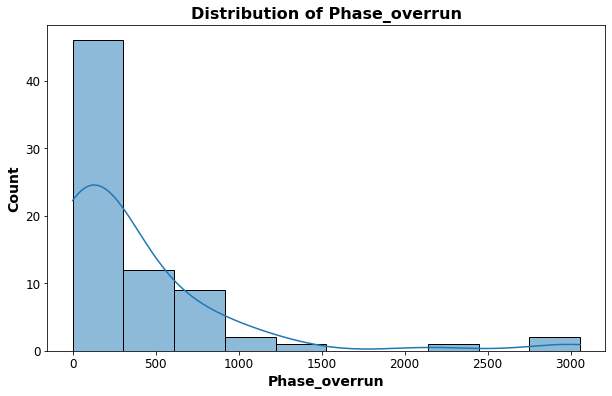

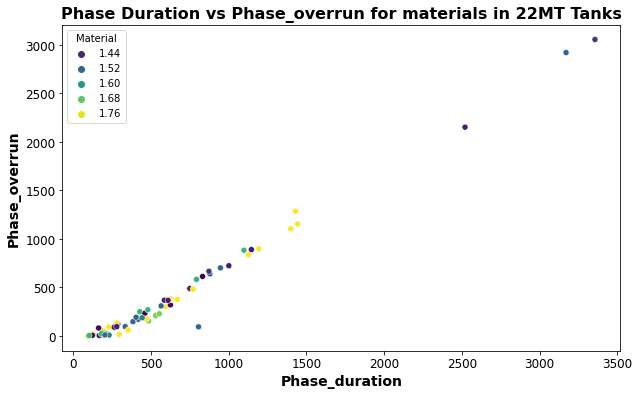

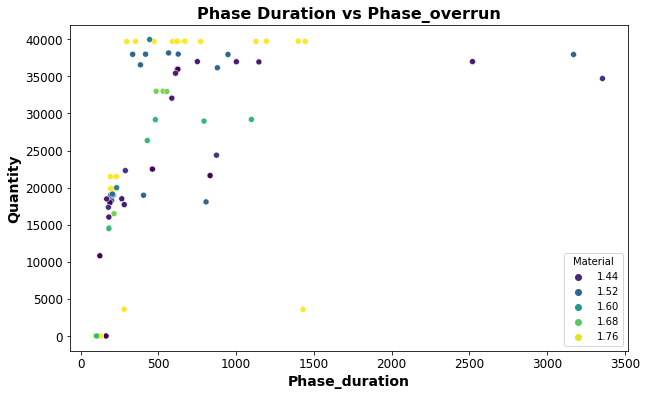

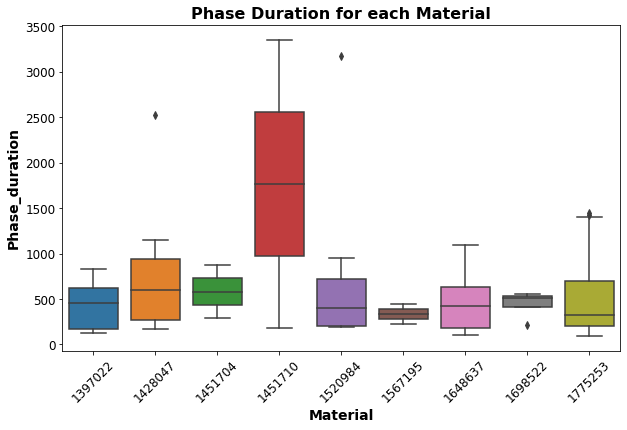

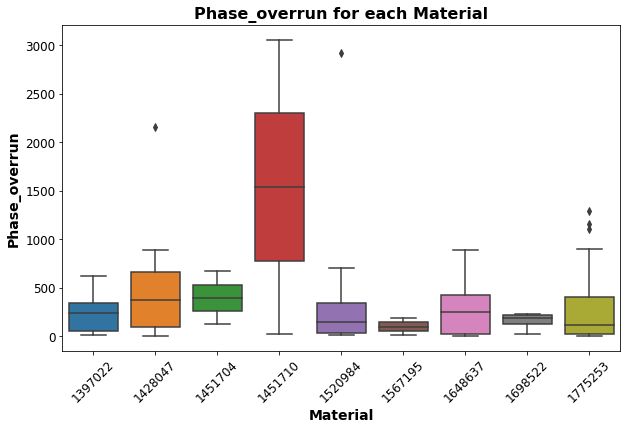

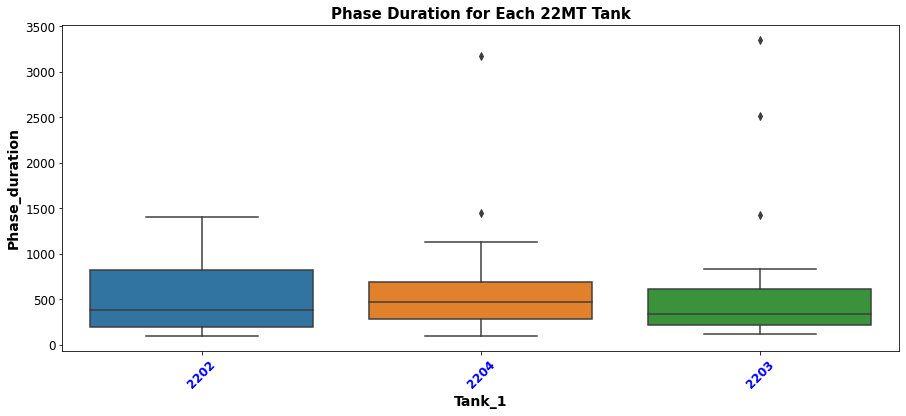

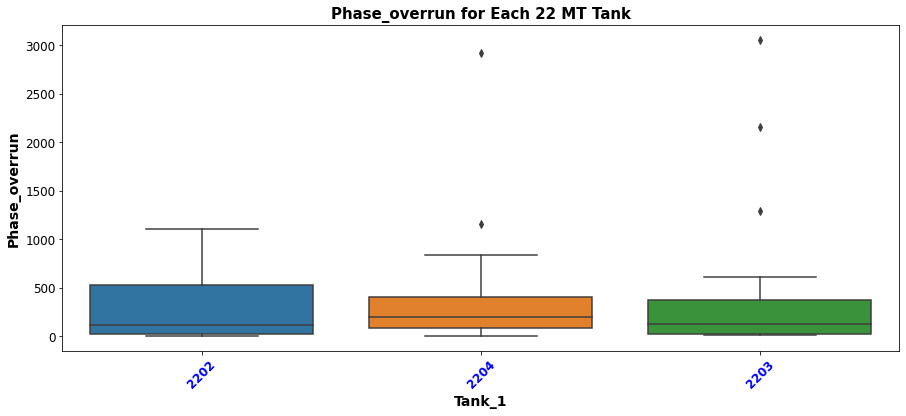

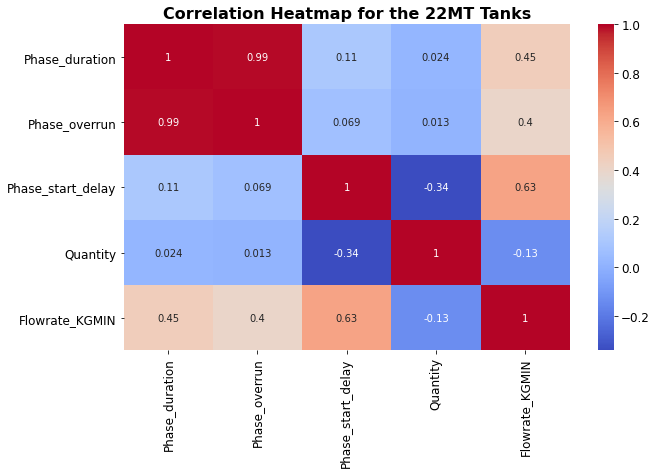

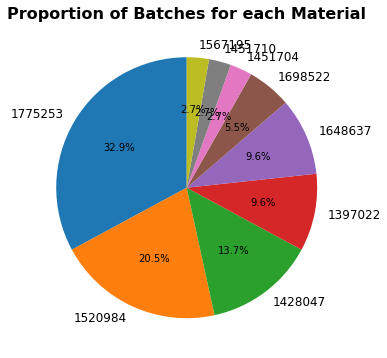

,BATCHID,Tank_1,Phase_duration,Phase_overrun,Phase_start_delay,Flowrate_KGMIN,Target_Phase_duration,Target_Flowrate,Quantity
count,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,67.000000,70.000000
mean,1.079874e+08,2203.000000,594.972603,371.684932,2026.849315,63.646040,23.235994,228.935807,28611.719200
std,6.397467e+04,0.816497,615.813260,584.612594,1954.713326,35.450276,15.595670,69.405964,9629.470801
min,1.078489e+08,2202.000000,93.000000,0.000000,2.000000,0.000000,11.100000,131.960800,11151.564000
25%,1.079567e+08,2202.000000,205.000000,25.000000,9.000000,36.774540,15.588235,188.249709,19857.794750
50%,1.079933e+08,2203.000000,428.000000,172.000000,2186.000000,68.392188,17.411765,237.850400,32062.170000
75%,1.080336e+08,2204.000000,750.000000,380.000000,3602.000000,92.402843,25.111111,247.907363,37713.667000
max,1.080848e+08,2204.000000,3356.000000,3057.000000,5474.000000,127.688275,121.500000,547.500000,39978.798000


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(aggregated_ProductionTank22_df1)
df2 = pd.DataFrame(aggregated_ProductionTank22_df2)

# 1. Bar Chart - Phase_duration for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_Overrun for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each BATCHID')
plt.xticks(rotation=45)
plt.show()

# 1. Bar Chart - Phase_start_delay for each Material
plt.figure(figsize=(10, 6))
sns.barplot(x='Material', y='Phase_start_delay', data=df2)
plt.title('Phase_start_delay for each Material')
plt.xticks(rotation=45)
plt.show()

# 2. Histogram - Phase_duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_duration'], bins=10, kde=True)
plt.title('Distribution of Phase Duration')
plt.show()

# 2. Histogram - Phase_overrun
plt.figure(figsize=(10, 6))
sns.histplot(df['Phase_overrun'], bins=10, kde=True)
plt.title('Distribution of Phase_overrun')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_overrun
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Phase_overrun', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun for materials in 22MT Tanks')
plt.show()

# 3. Scatter Plot - Phase_duration vs Phase_start_delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Phase_duration', y='Quantity', data=df2, hue='Material', palette='viridis')
plt.title('Phase Duration vs Phase_overrun')
plt.show()

# 4. Box Plot - Phase_duration grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_duration', data=df2)
plt.title('Phase Duration for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_overrun grouped by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Phase_overrun', data=df2)
plt.title('Phase_overrun for each Material')
plt.xticks(rotation=45)
plt.show()

# 4. Box Plot - Phase_Phase_duration grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_duration', data=aggregated_ProductionTank22_df2, order=tanks)
plt.title('Phase Duration for Each 22MT Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 4. Box Plot - Phase_overrun grouped by each 22MT Tank
plt.figure(figsize=(15, 6))  # Adjust the size as needed
sns.boxplot(x='Tank_1', y='Phase_overrun', data=aggregated_ProductionTank22_df2, order=tanks)
plt.title('Phase_overrun for Each 22 MT Tank', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold', color='blue')
plt.show()

# 5. Heatmap - Correlation heatmap
correlation_matrix = df[['Phase_duration', 'Phase_overrun', 'Phase_start_delay','Quantity','Flowrate_KGMIN']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for the 22MT Tanks')
plt.show()

# 6. Pie Chart - Proportion of batches for each Material
material_counts = df2['Material'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(material_counts, labels=material_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Batches for each Material')
plt.show()

#7 Descriptive Statistics 

aggregated_ProductionTank22_df1.describe()


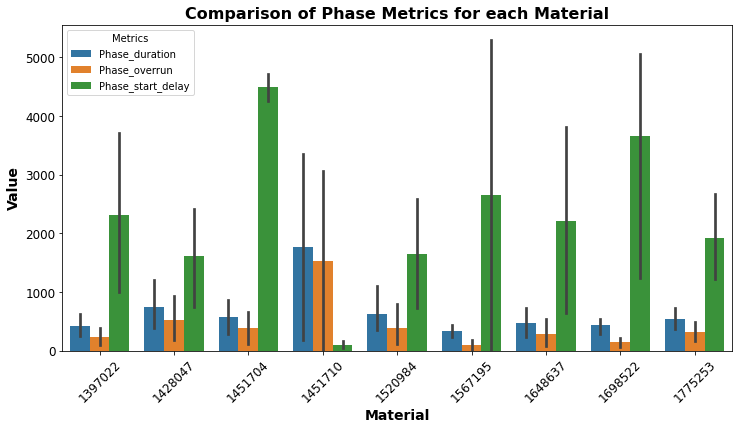

In [47]:
df = pd.DataFrame(aggregated_ProductionTank22_df2)

# Melt the data to get it in long form
df_melted = df.melt(id_vars='Material', value_vars=['Phase_duration', 'Phase_overrun', 'Phase_start_delay'])

# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Material', y='value', hue='variable', data=df_melted)
plt.title('Comparison of Phase Metrics for each Material')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

In [ ]:
## Examining the differences in production of materials that are common between all 22MT tanks

In [49]:
tanks_in_group1 = ['2202', '2203', '2204']
common_materials = aggregated_ProductionTank22_df2.groupby('Material').filter(lambda x: x['Tank_1'].nunique() == len(tanks_in_group1))['Material'].unique()

In [50]:
filtered_data = aggregated_ProductionTank22_df2[aggregated_ProductionTank22_df2['Material'].isin(common_materials)]

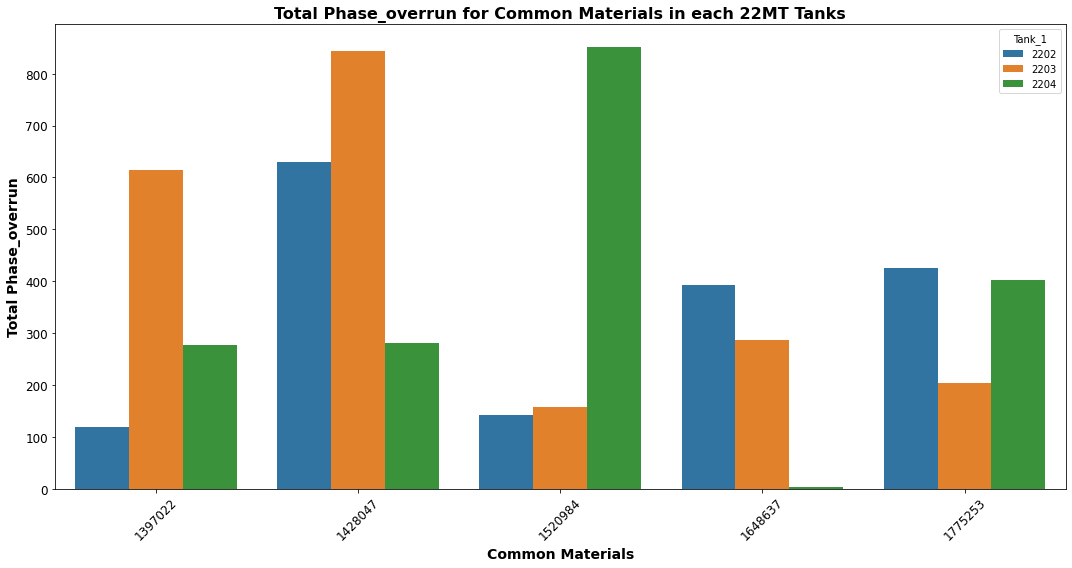

In [56]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_overrun', hue='Tank_1', ci=None)

plt.title('Total Phase_overrun for Common Materials in each 22MT Tanks')
plt.ylabel('Total Phase_overrun')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

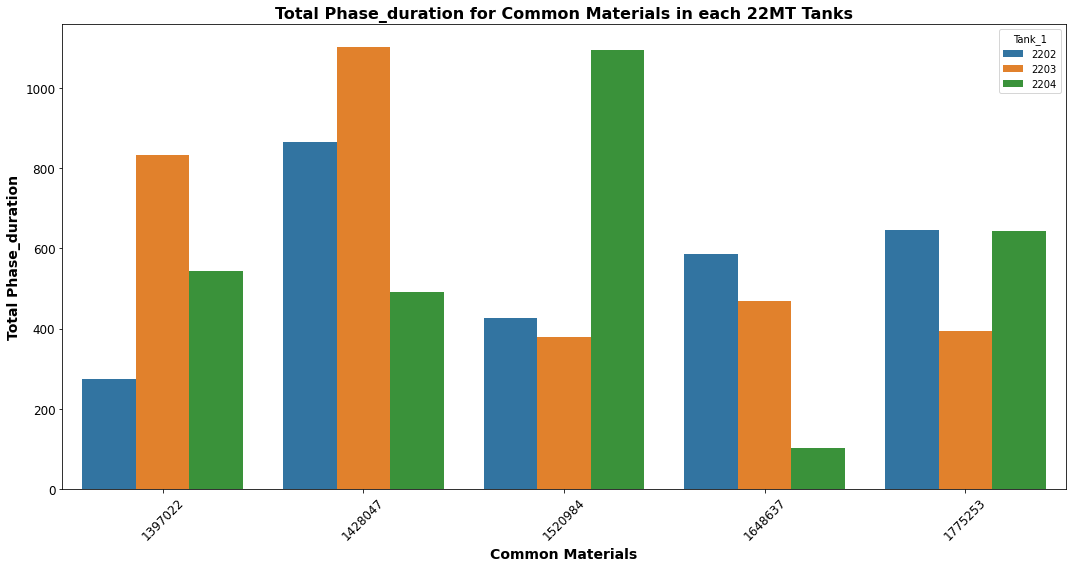

In [58]:
plt.figure(figsize=(15, 8))
sns.barplot(data=filtered_data, x='Material', y='Phase_duration', hue='Tank_1', ci=None)

plt.title('Total Phase_duration for Common Materials in each 22MT Tanks')
plt.ylabel('Total Phase_duration')
plt.xlabel('Common Materials')
plt.legend(title='Tank_1', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

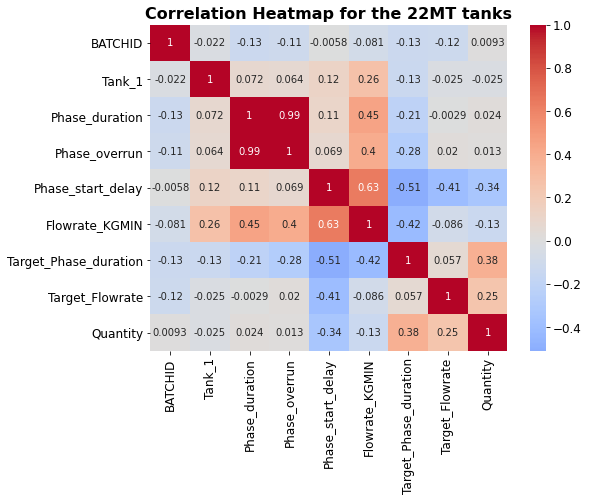

In [60]:
correlation_matrix = aggregated_ProductionTank22_df1.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap for the 22MT tanks")
plt.show()

In [ ]:
# Handling missing values
aggregated_ProductionTank22_df1.dropna(inplace=True)  # Remove rows with missing values

In [ ]:
# Handling duplicates
aggregated_ProductionTank22_df1.drop_duplicates(inplace=True)  # Remove duplicate rows

In [ ]:
# Define columns where you want to detect and remove outliers
ProductionTank22_df2 = pd.DataFrame(aggregated_ProductionTank22_df1)
columns_to_check = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN', 'Target_Phase_duration', 'Target_Flowrate']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column, iqr_multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for each column
for col in columns_to_check:
    ProductionTank22_df2 = remove_outliers_iqr(ProductionTank22_df2, col)

# Display the cleaned DataFrame
print(ProductionTank22_df2)

In [ ]:
# For the original DataFrame
print("Original DataFrame Summary Statistics:")
print(aggregated_ProductionTank22_df1.describe())

# After removing outliers
print("\nCleaned DataFrame Summary Statistics:")
print(ProductionTank22_df2.describe())

In [ ]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN','Quantity']
aggregated_ProductionTank22_df1[numerical_cols] = scaler.fit_transform(aggregated_ProductionTank22_df1[numerical_cols])
print(aggregated_ProductionTank22_df1.head())

In [ ]:
# Scaling numerical variables (if needed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN','Quantity']
ProductionTank22_df2[numerical_cols] = scaler.fit_transform(ProductionTank22_df2[numerical_cols])
print(ProductionTank22_df2.head())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate','Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred_train = ridge_model.predict(X_train)
ridge_pred_test = ridge_model.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred_train = lasso_model.predict(X_train)
lasso_pred_test = lasso_model.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)
rf_feature_importance = rf_model.feature_importances_

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)
gb_feature_importance = gb_model.feature_importances_

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)

# Bagging Regressor (based on Decision Trees by default)
bag_model = BaggingRegressor(n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)
bag_pred_train = bag_model.predict(X_train)
bag_pred_test = bag_model.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)

# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)



# Print the results DataFrame
#print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('22results.xlsx', index=False)


In [ ]:
# Create a list of models with their respective hyperparameters
# Initialize models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42)
]

# Perform cross-validation for each model
for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE back to positive
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()
    print(f"{model_name}:\n  Mean MSE: {mean_mse:.6f}\n  Std MSE: {std_mse:.6f}\n")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Load your dataset (replace 'ProductionTank2202_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun','Target_Flowrate'], axis=1)
y = df['Phase_overrun']




# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)
lr_train_mse = mean_squared_error(y_train, lr_pred_train)
lr_test_mse = mean_squared_error(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)
results_df = results_df.append({'Model': 'Linear Regression', 'Train MSE': lr_train_mse, 'Test MSE': lr_test_mse, 'Train R2': lr_train_r2, 'Test R2': lr_test_r2}, ignore_index=True)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)
ridge_train_r2 = r2_score(y_train, ridge_pred_train)
ridge_test_r2 = r2_score(y_test, ridge_pred_test)
results_df = results_df.append({'Model': 'Ridge Regression', 'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'Train R2': ridge_train_r2, 'Test R2': ridge_test_r2}, ignore_index=True)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)
lasso_train_r2 = r2_score(y_train, lasso_pred_train)
lasso_test_r2 = r2_score(y_test, lasso_pred_test)
results_df = results_df.append({'Model': 'Lasso Regression', 'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'Train R2': lasso_train_r2, 'Test R2': lasso_test_r2}, ignore_index=True)

# Random Forest Regressor with Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)
rf_train_mse = mean_squared_error(y_train, rf_pred_train)
rf_test_mse = mean_squared_error(y_test, rf_pred_test)
rf_train_r2 = r2_score(y_train, rf_pred_train)
rf_test_r2 = r2_score(y_test, rf_pred_test)
rf_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Random Forest Regressor', 'Train MSE': rf_train_mse, 'Test MSE': rf_test_mse, 'Train R2': rf_train_r2, 'Test R2': rf_test_r2}, ignore_index=True)

# Gradient Boosting Regressor with Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
gb_pred_train = best_gb.predict(X_train)
gb_pred_test = best_gb.predict(X_test)
gb_train_mse = mean_squared_error(y_train, gb_pred_train)
gb_test_mse = mean_squared_error(y_test, gb_pred_test)
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_feature_importance = rf_model.feature_importances_
results_df = results_df.append({'Model': 'Gradient Boosting Regressor', 'Train MSE': gb_train_mse, 'Test MSE': gb_test_mse, 'Train R2': gb_train_r2, 'Test R2': gb_test_r2}, ignore_index=True)

# Decision Tree Regressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_pred_train = best_dt.predict(X_train)
dt_pred_test = best_dt.predict(X_test)
dt_train_mse = mean_squared_error(y_train, dt_pred_train)
dt_test_mse = mean_squared_error(y_test, dt_pred_test)
dt_train_r2 = r2_score(y_train, dt_pred_train)
dt_test_r2 = r2_score(y_test, dt_pred_test)
results_df = results_df.append({'Model': 'Decision Tree Regressor', 'Train MSE': dt_train_mse, 'Test MSE': dt_test_mse, 'Train R2': dt_train_r2, 'Test R2': dt_test_r2}, ignore_index=True)


# Bagging Regressor with Hyperparameter Tuning
bag_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bag_grid.fit(X_train, y_train)
bag_best = bag_grid.best_estimator_

# Using the best estimator from GridSearch to make predictions
bag_pred_train = bag_best.predict(X_train)
bag_pred_test = bag_best.predict(X_test)
bag_train_mse = mean_squared_error(y_train, bag_pred_train)
bag_test_mse = mean_squared_error(y_test, bag_pred_test)
bag_train_r2 = r2_score(y_train, bag_pred_train)
bag_test_r2 = r2_score(y_test, bag_pred_test)
results_df = results_df.append({'Model': 'Bagging Regressor', 'Train MSE': bag_train_mse, 'Test MSE': bag_test_mse, 'Train R2': bag_train_r2, 'Test R2': bag_test_r2}, ignore_index=True)


# AdaBoost Regressor with Hyperparameter Tuning
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(random_state=42), ada_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ada_model.fit(X_train, y_train)
ada_pred_train = ada_model.predict(X_train)
ada_pred_test = ada_model.predict(X_test)
ada_train_mse = mean_squared_error(y_train, ada_pred_train)
ada_test_mse = mean_squared_error(y_test, ada_pred_test)
ada_train_r2 = r2_score(y_train, ada_pred_train)
ada_test_r2 = r2_score(y_test, ada_pred_test)
results_df = results_df.append({'Model': 'AdaBoost Regressor', 'Train MSE': ada_train_mse, 'Test MSE': ada_test_mse, 'Train R2': ada_train_r2, 'Test R2': ada_test_r2}, ignore_index=True)




# Print the results DataFrame
print(results_df)
# Print the results DataFrame in tabulated form
print(tabulate(results_df, headers='keys', tablefmt='grid'))
# Save results DataFrame to an Excel file
results_df.to_excel('22 TUN results.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
y = df['Phase_overrun']

# Initialize k-fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define the models to be evaluated
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    SVR(),
    MLPRegressor(),
    DecisionTreeRegressor(random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42)
]

# Iterate through each model and perform k-fold cross-validation
for model in models:
    model_name = model.__class__.__name__
    train_mse_list = []
    test_mse_list = []
    train_r2_list = []
    test_r2_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
    
    mean_train_mse = sum(train_mse_list) / num_folds
    mean_test_mse = sum(test_mse_list) / num_folds
    mean_train_r2 = sum(train_r2_list) / num_folds
    mean_test_r2 = sum(test_r2_list) / num_folds
    
    results_df = results_df.append({'Model': model_name, 'Train MSE': mean_train_mse, 'Test MSE': mean_test_mse,
                                    'Train R2': mean_train_r2, 'Test R2': mean_test_r2}, ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('kfold_results.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# List of regression models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
]

# Apply PCR to each model
for model in models:
    model_name = model.__class__.__name__

    # Apply PCA to reduce dimensionality
    num_components = 5  # You can choose the number of principal components
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the model with principal components
    model.fit(X_train_pca, y_train)
    pred_train = model.predict(X_train_pca)
    pred_test = model.predict(X_test_pca)
    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)

    # Store results in the DataFrame
    results_df = results_df.append({'Model': model_name, 'Train MSE': train_mse,
                                    'Test MSE': test_mse, 'Train R2': train_r2, 'Test R2': test_r2},
                                   ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('pcr_results.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor  # Import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# List of regression models including MLPRegressor
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)  # Neural Network
]

# Apply PCR to each model
for model in models:
    model_name = model.__class__.__name__

    # Apply PCA to reduce dimensionality
    num_components = 5  # You can choose the number of principal components
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the model with principal components
    if model_name == 'MLPRegressor':
        # For the neural network, use the original features instead of principal components
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
    else:
        model.fit(X_train_pca, y_train)
        pred_train = model.predict(X_train_pca)
        pred_test = model.predict(X_test_pca)

    train_mse = mean_squared_error(y_train, pred_train)
    test_mse = mean_squared_error(y_test, pred_test)
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)

    # Store results in the DataFrame
    results_df = results_df.append({'Model': model_name, 'Train MSE': train_mse,
                                    'Test MSE': test_mse, 'Train R2': train_r2, 'Test R2': test_r2},
                                   ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('pcr_nn_results.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

#Phase_duration', 'Phase_overrun', 'Phase_start_delay', 'Flowrate_KGMIN'

# Define features and target
X = df.drop(['Phase_overrun'], axis=1)
y = df['Phase_overrun']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can choose the number of neighbors
knn_model.fit(X_train_scaled, y_train)
knn_pred_train = knn_model.predict(X_train_scaled)
knn_pred_test = knn_model.predict(X_test_scaled)
knn_train_mse = mean_squared_error(y_train, knn_pred_train)
knn_test_mse = mean_squared_error(y_test, knn_pred_test)
knn_train_r2 = r2_score(y_train, knn_pred_train)
knn_test_r2 = r2_score(y_test, knn_pred_test)
results_df = results_df.append({'Model': 'K-Nearest Neighbors', 'Train MSE': knn_train_mse,
                                'Test MSE': knn_test_mse, 'Train R2': knn_train_r2, 'Test R2': knn_test_r2},
                               ignore_index=True)

# Support Vector Machine
svm_model = SVR(kernel='rbf')  # You can choose the kernel and tune other hyperparameters
svm_model.fit(X_train_scaled, y_train)
svm_pred_train = svm_model.predict(X_train_scaled)
svm_pred_test = svm_model.predict(X_test_scaled)
svm_train_mse = mean_squared_error(y_train, svm_pred_train)
svm_test_mse = mean_squared_error(y_test, svm_pred_test)
svm_train_r2 = r2_score(y_train, svm_pred_train)
svm_test_r2 = r2_score(y_test, svm_pred_test)
results_df = results_df.append({'Model': 'Support Vector Machine', 'Train MSE': svm_train_mse,
                                'Test MSE': svm_test_mse, 'Train R2': svm_train_r2, 'Test R2': svm_test_r2},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('knn_svm_results.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tabulate import tabulate

# Load your dataset (replace 'ProductionTank22_df2' with your actual dataset)
df = pd.DataFrame(ProductionTank22_df2)

# Define features and target
#X = df.drop(['Phase_overrun', 'Target_Flowrate', 'Target_Phase_duration'], axis=1)
#y = df['Phase_overrun']

X = df.drop(['Phase_start_delay'], axis=1)
y = df['Phase_start_delay']




# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2'])

# Define a simple feedforward neural network
def build_simple_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the simple neural network
simple_nn = build_simple_nn()
simple_nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_simple_nn = simple_nn.predict(X_train_scaled)
pred_test_simple_nn = simple_nn.predict(X_test_scaled)
train_mse_simple_nn = mean_squared_error(y_train, pred_train_simple_nn)
test_mse_simple_nn = mean_squared_error(y_test, pred_test_simple_nn)
train_r2_simple_nn = r2_score(y_train, pred_train_simple_nn)
test_r2_simple_nn = r2_score(y_test, pred_test_simple_nn)
results_df = results_df.append({'Model': 'Simple Neural Network', 'Train MSE': train_mse_simple_nn,
                                'Test MSE': test_mse_simple_nn, 'Train R2': train_r2_simple_nn, 'Test R2': test_r2_simple_nn},
                               ignore_index=True)

# Define a Convolutional Neural Network (CNN)
def build_cnn():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape data for CNN (add an extra dimension for channels)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define a Convolutional Neural Network (CNN)
def build_cnn():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and evaluate the CNN
cnn = build_cnn()
cnn.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
pred_train_cnn = cnn.predict(X_train_reshaped)
pred_test_cnn = cnn.predict(X_test_reshaped)
train_mse_cnn = mean_squared_error(y_train, pred_train_cnn)
test_mse_cnn = mean_squared_error(y_test, pred_test_cnn)
train_r2_cnn = r2_score(y_train, pred_train_cnn)
test_r2_cnn = r2_score(y_test, pred_test_cnn)
results_df = results_df.append({'Model': 'Convolutional Neural Network', 'Train MSE': train_mse_cnn,
                                'Test MSE': test_mse_cnn, 'Train R2': train_r2_cnn, 'Test R2': test_r2_cnn},
                               ignore_index=True)

# Print the results DataFrame
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Save results DataFrame to an Excel file
results_df.to_excel('neural_network_results.xlsx', index=False)